In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats

In [2]:
# Load datasets
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc")
# catalog = pd.read_csv('eq_200204_202102.csv')
# catalog["time"] = catalog["time"].astype("datetime64")
catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
catalog['dmass'] = catalog.apply(lambda row: get_mass(row), axis=1)

In [4]:
# catalog['on_land'] = globe.is_land(catalog.latitude, catalog.longitude)

In [5]:
def plot_hist(all_time_periods, earthquake_only):
    
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    ax = plt.subplot(1,2,1)
    
    # Cumulative histogram
    plt.style.use('fivethirtyeight')
    bins = np.histogram(earthquake_only, 40)[1]
    ax.hist(earthquake_only, bins, density = True, cumulative=True, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
    ax.set_ylim((-0.1,1.3))
    ax.legend()
    
    # Non-cumulative histogram
    ax = plt.subplot(1,2,2)
    ax.hist(earthquake_only, bins, density = True, cumulative=False, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
    ax.set_ylim((-0.05,0.2))
    ax.set_xlim((-40,60))
    ax.legend()

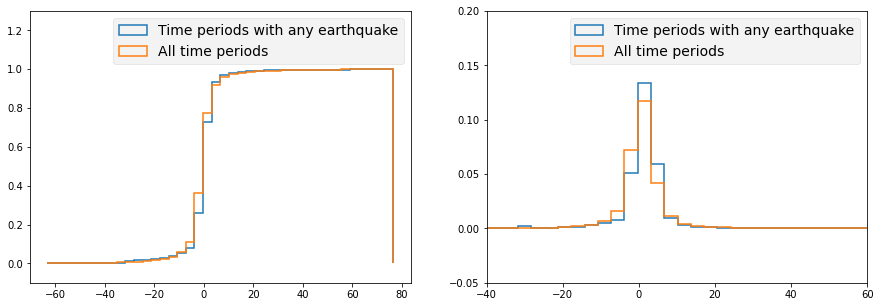

In [6]:
plot_hist(ds['lwe_thickness'].data.flatten(),catalog['dmass'])

In [7]:
# What is the probability that the two results are the same?
# if p-value < significance level, reject that samples are from same distribution


# a = np.array(catalog[catalog['P_triggered'] < 0.9]['dmass'])
# b = np.array(ds['lwe_thickness'].data.flatten())
# stats.ks_2samp(a,b, mode='asymp')
# output: KstestResult(statistic=0.04963563191122192, pvalue=0.1566585634353047)

# a = np.array(catalog.dmass)
# b =  np.array(ds['lwe_thickness'].data.flatten())
# stats.ks_2samp(, d, mode='asymp')
# output: KstestResult(statistic=0.12212035878155786, pvalue=2.4886704147936648e-123)

In [62]:
def calc_stats(a,b):
    '''
    Calculate stats for the distributions a and b
    a: distribution during earthquakes
    b: distribution over all time periods
    '''
    
    result = {} # this creates a dictionary
    
    # result['cvm'] = stats.cramervonmises_2samp(a, b, method='auto')
    result['median_all'] = np.median(b)
    result['median_eq'] = np.median(a)
    
    return result
    
calc_stats(np.array(catalog.dmass),np.array(ds['lwe_thickness'].data.flatten()))


In [76]:
stats = []

for i in range(6):
    stats.append(calc_stats(D_eq_values[i], D_values[i]))

In [77]:
stats

[{'median_all': 0.4074970991449007, 'median_eq': 1.3031345620154222},
 {'median_all': -0.008286149883062179, 'median_eq': -0.059496689111287665},
 {'median_all': -9.467469722892982e-05, 'median_eq': 0.00020919781520670905},
 {'median_all': -0.006037354075069553, 'median_eq': 0.0007561358482912975},
 {'median_all': 0.0012909011020454234, 'median_eq': -0.0018776853942529508},
 {'median_all': -0.0003115457947751385, 'median_eq': -0.019457419573758752}]

## Correlation between reconstructed D values and seismic activity


In [9]:
# Loading D values from pca grace

D_eq_values = []
for filenumber in np.arange(1,7):
    D_eq_values.append( np.loadtxt('D_eq_%d.csv'%filenumber, delimiter=',') )
    # asumes filenames like 'D_eq_values_1.csv', 'D_eq_values_2.csv', and so on

D_values = []
for filenumber in np.arange(1,7):
    D_values.append( np.loadtxt('D_%d.csv'%filenumber, delimiter=',') )

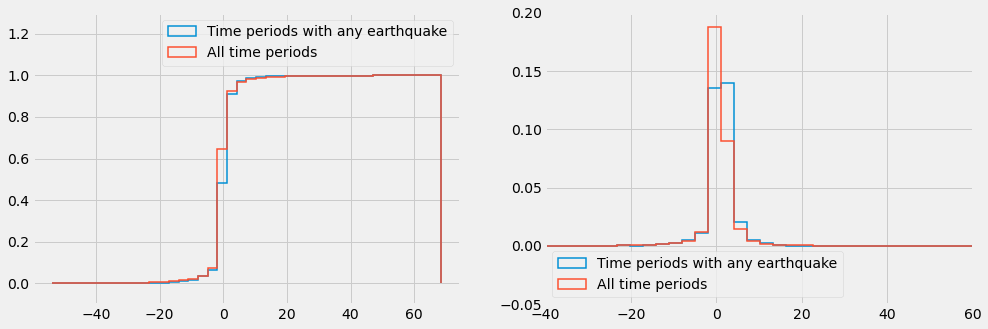

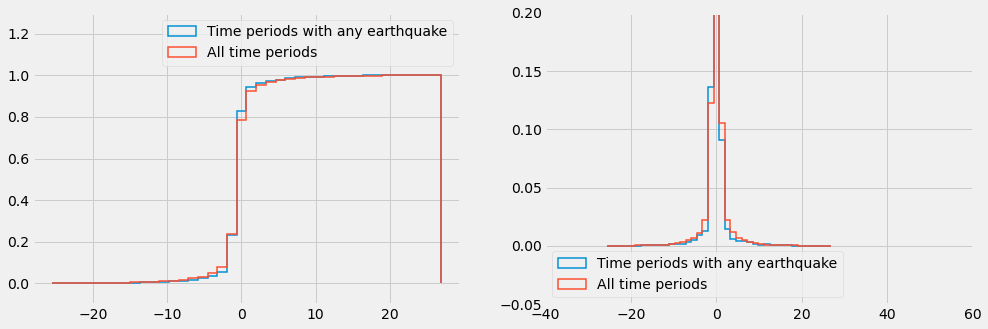

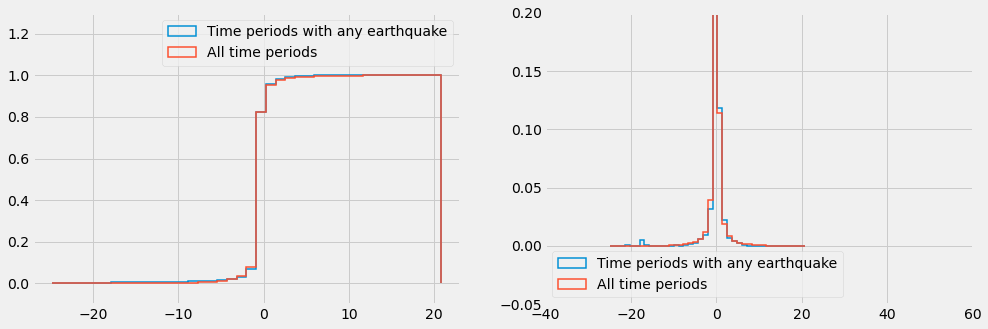

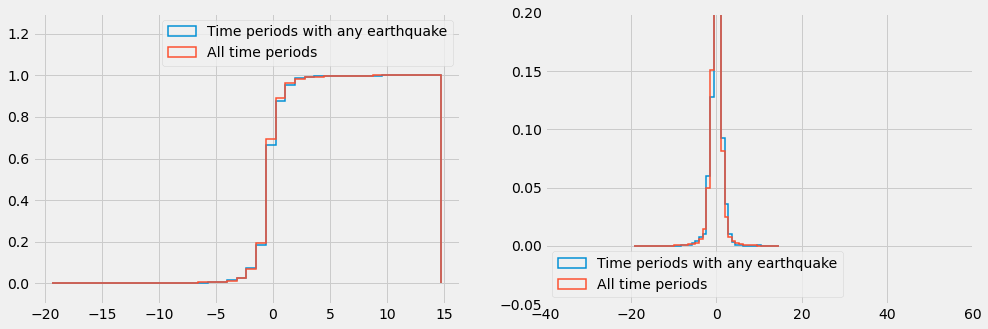

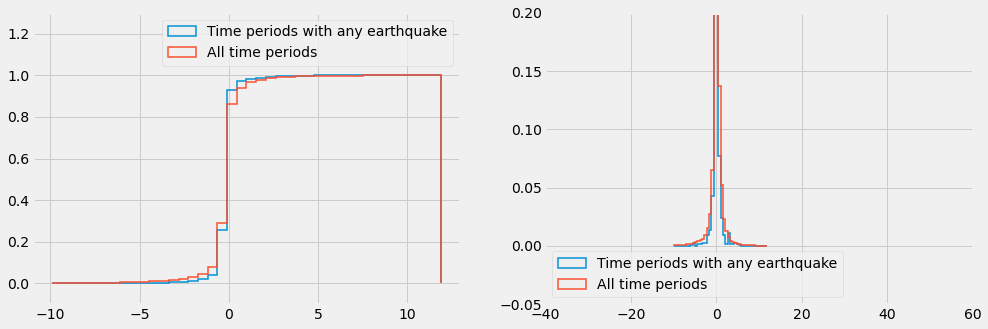

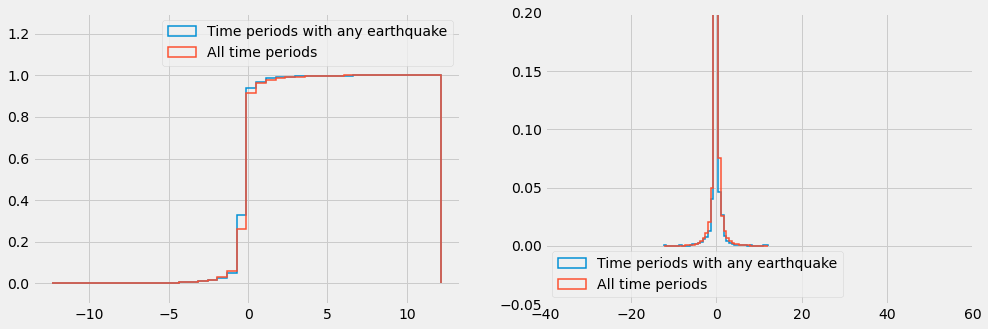

In [54]:
for i in range(6):
    plot_hist(D_values[i].flatten(), D_eq_values[i])

    
# how to make y lim appropriate for all graphs?

In [ ]:
np.median(D.flatten())

In [ ]:
np.median(D_eq_values.flatten())

## Correlation between D values reconstructed from detrended data and seismic activity

In [56]:
# Loading detrended data

D_detrend_eq_values = []
for filenumber in np.arange(1,7):
    D_detrend_eq_values.append( np.loadtxt('D_detrend_eq_%d.csv'%filenumber, delimiter=',') )

D_detrend_values = []
for filenumber in np.arange(1,7):
    D_detrend_values.append( np.loadtxt('D_detrend_%d.csv'%filenumber, delimiter=',') )

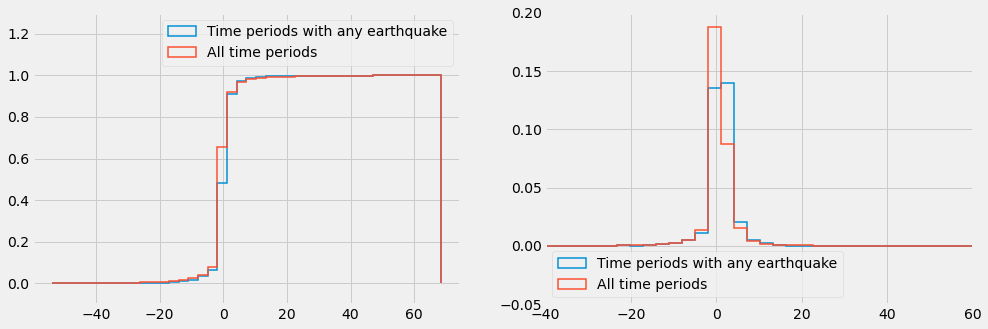

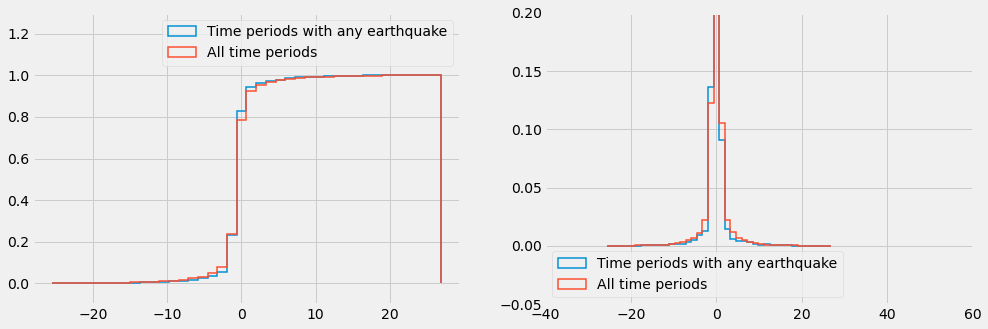

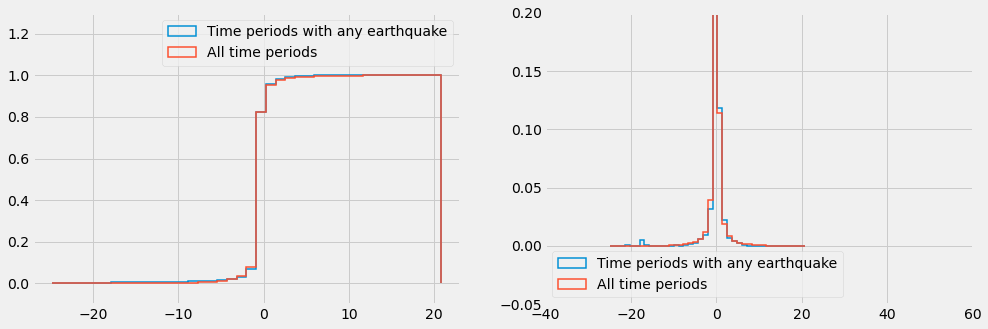

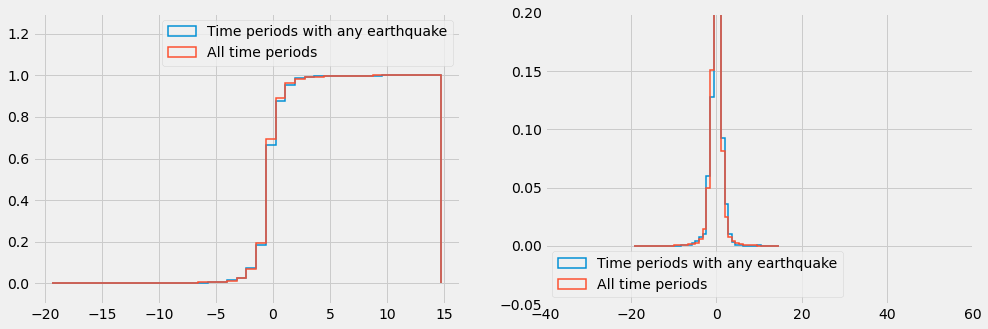

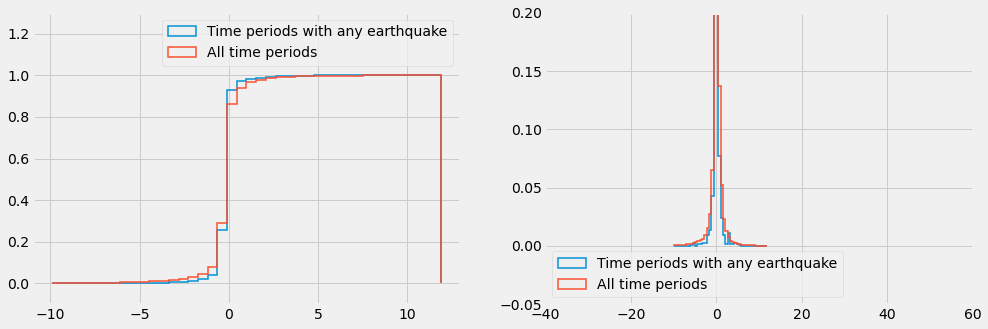

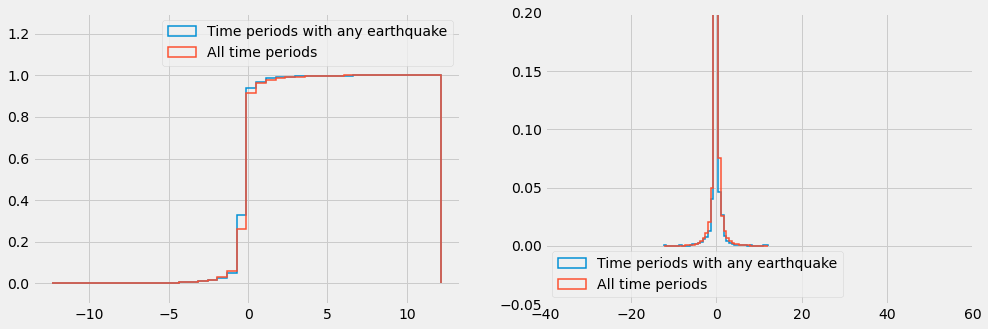

In [58]:
for i in range(6):
    plot_hist(D_detrend_values[i].flatten(), D_detrend_eq_values[i])

In [75]:
stats_detrend = []

for i in range(6):
    stats_detrend.append(calc_stats(D_detrend_eq_values[i], D_detrend_values[i]))

In [78]:
stats_detrend

[{'median_all': 0.3595983278020353, 'median_eq': 1.3031345620154222},
 {'median_all': -0.008286149883062179, 'median_eq': -0.059496689111287665},
 {'median_all': -9.467469722892982e-05, 'median_eq': 0.00020919781520670905},
 {'median_all': -0.006037354075069553, 'median_eq': 0.0007561358482912975},
 {'median_all': 0.0012909011020454234, 'median_eq': -0.0018776853942529508},
 {'median_all': -0.0003115457947751385, 'median_eq': -0.019457419573758752}]